#4.8.2 선형회귀

## y=wx 형태의 선형회귀를 keras로 구현하기

##라이브러리 임포트

In [1]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##데이터 만들기

In [2]:
# 0 부터 10까지 총 11개이지만, 10개의 X값 만들기임.
X = np.linspace(0, 10, 10)  # 왼쪽 함수 이름이 line이 아니라 lin(시작,끝,계수)임.
Y = X + np.random.randn(len(X)) # 교재의 *X.shape보다 len(X)이 쓰기 편함. len(X)=10.
    # np.random.randn(a) : 표준정규분포(평균=0,분산=1)를 사용하여 a개의 random 값 뽑아내기.
    # 만약 (a)의 a가 1이면 1개의 random 값을 추출하여 현재 X가 10개이므로 10개에 똑같이 더해줌.
    # 지금과 같이 a가 10이면 10개의 random 값을 추출하고 10개의 X에 각각 더해주게 됨. 

##데이터 조회

In [3]:
for x, y in zip(X,Y):   # zip(X,Y) : X와 Y의 각 값들을 순서에 맞춰서 튜플항 (0,0)으로 변환.
    print((round(x,1), round(y,1))) # round(x,1) : x값을 소수점 첫째 자리로 반올림.

(0.0, 1.4)
(1.1, 1.9)
(2.2, 3.7)
(3.3, 4.5)
(4.4, 5.1)
(5.6, 6.0)
(6.7, 6.4)
(7.8, 8.7)
(8.9, 8.7)
(10.0, 11.9)


##선형회귀 모델 만들기

In [4]:
model = Sequential() # keras의 선형회귀 모델 사용
model.add(Dense(input_dim=1, units=1, activation="linear", use_bias=False))
              # 입력자원 수, 출력(예측)값 수, 선형성 유지, y=wx+b(바이어스)의 형태에서 b가 없으므로 False

#SGD(Stochastic Gradient Descent, 확률경사하강) optimizer 실행
sgd = optimizers.SGD(learning_rate=0.1)
# 학습률(learning_late) : 너무 낮으면 학습 속도 느림. 너무 크면 학습이 제대로 수행되지 X.

model.compile(optimizer='sgd', loss='mse')
# .compile : keras 모델 설정. optimizer : 옵티마이저(나중에 배움), loss : 손실함수

In [5]:
# 학습 전 최초 무작위로 설정된 가중치(weight) w값(여기서는 기울기) 조회
weights = model.layers[0].get_weights() # layer(0)에 저장된 weight(가중치) 값들을 weights 리스트에 저장
w = weights[0][0][0]    # 3중 리스트의 첫 번째 값이란 뜻. 첫 번째 layer의 첫 번째 weight 값과 동일.

print('최초 무작위 설정 가중치 w 값 : %f' %w) # 직접 수치 값 출력

최초 무작위 설정 가중치 w 값 : 1.658795


##선형회귀 모델 학습

In [6]:
model.fit(X, Y, batch_size=10,epochs=10, verbose=1)
      # 입력, 정답, 데이터 개수, 반복학습 회수, =0 : 아무 것도 출력하지 않음.
      #                                         =2 : epoch당 시간(초)와 loss 값만 출력

Epoch 1/10
1/1 [==============================] - 13s 13s/step - loss: 11.6016
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 1.7179
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8502
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7740
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7674
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7668
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.7667
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.7667
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 0.7667
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.7667


In [7]:
# 학습 완료 후, 학습된 선형회귀 모델의 가중치 w값(여기서는 기울기) 조회
weights = model.layers[0].get_weights() 
w = weights[0][0][0]    

print('학습된 선형회귀 모델 가중치 w 값 : %f' %w) 

학습된 선형회귀 모델 가중치 w 값 : 1.103874


##선형회귀 시각화

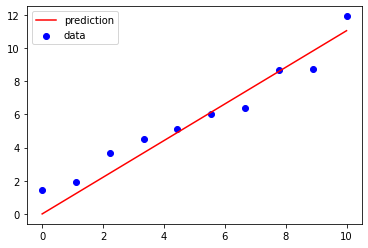

In [8]:
plt.scatter(X, Y, label='data',color='blue')           # X와 Y 위치에 파란 점 찍기, 이 점들의 명칭을 data로 함.
plt.plot(X, w*X, label='prediction',color='red')    # X와 w*X 위치에 점을 찍은 후 이들을 빨간선으로 연결하기. 
plt.legend()   # 범례(명칭) 표시                      빨간선의 명칭을 prediction으로 함.
plt.show()